In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cols = ["name","age","gender","job"]
cols

['name', 'age', 'gender', 'job']

In [0]:
user1 = pd.DataFrame([["Alice",19,"f","student"],["john",26,"m","student"]],columns =cols)

In [4]:
print(user1)
user1

    name  age gender      job
0  Alice   19      f  student
1   john   26      m  student


,name,age,gender,job
0,Alice,19,f,student
1,john,26,m,student


In [0]:
user2 = pd.DataFrame([["eric",22,"m","student"],["paul",58,"f","manager"]],columns = cols)

In [6]:
user2

,name,age,gender,job
0,eric,22,m,student
1,paul,58,f,manager


In [0]:
user3 = pd.DataFrame(dict(name=["peter","julie"],age=[33,44],gender=["m","f"],
                         job=["engineer","scientist"]))

In [8]:
user3

,name,age,gender,job
0,peter,33,m,engineer
1,julie,44,f,scientist


In [9]:
# Concatenation operation

user1.append(user2) 

,name,age,gender,job
0,Alice,19,f,student
1,john,26,m,student
0,eric,22,m,student
1,paul,58,f,manager


In [10]:
user1.append((user2.append(user3)))

,name,age,gender,job
0,Alice,19,f,student
1,john,26,m,student
0,eric,22,m,student
1,paul,58,f,manager
0,peter,33,m,engineer
1,julie,44,f,scientist


In [11]:
users = pd.concat([user1,user2,user3])
users

,name,age,gender,job
0,Alice,19,f,student
1,john,26,m,student
0,eric,22,m,student
1,paul,58,f,manager
0,peter,33,m,engineer
1,julie,44,f,scientist


In [12]:
# Joining of data frame

user4 = pd.DataFrame(dict(name=["alice","john","eric","julie"],age=[1,2,3,4],height=[165,180,175,171]))
user4

,name,age,height
0,alice,1,165
1,john,2,180
2,eric,3,175
3,julie,4,171


In [13]:
merge_inter = pd.merge(users,user4,on="name")
merge_inter

,name,age_x,gender,job,age_y,height
0,john,26,m,student,2,180
1,eric,22,m,student,3,175
2,julie,44,f,scientist,4,171


In [14]:
merge_outer = pd.merge(users,user4,on="name",how="outer")
merge_outer

,name,age_x,gender,job,age_y,height
0,Alice,19.0,f,student,NaN,NaN
1,john,26.0,m,student,2.0,180.0
2,eric,22.0,m,student,3.0,175.0
3,paul,58.0,f,manager,NaN,NaN
4,peter,33.0,m,engineer,NaN,NaN
5,julie,44.0,f,scientist,4.0,171.0
6,alice,NaN,NaN,NaN,1.0,165.0


In [15]:
users
type(users)
users.head()
users.tail()

,name,age,gender,job
1,john,26,m,student
0,eric,22,m,student
1,paul,58,f,manager
0,peter,33,m,engineer
1,julie,44,f,scientist


In [16]:
users.values

array([['Alice', 19, 'f', 'student'],
       ['john', 26, 'm', 'student'],
       ['eric', 22, 'm', 'student'],
       ['paul', 58, 'f', 'manager'],
       ['peter', 33, 'm', 'engineer'],
       ['julie', 44, 'f', 'scientist']], dtype=object)

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 1
Data columns (total 4 columns):
name      6 non-null object
age       6 non-null int64
gender    6 non-null object
job       6 non-null object
dtypes: int64(1), object(3)
memory usage: 240.0+ bytes


In [18]:
users.describe(include="all")

,name,age,gender,job
count,6,6.000000,6,6
unique,6,NaN,2,4
top,eric,NaN,m,student
freq,1,NaN,3,3
mean,NaN,33.666667,NaN,NaN
std,NaN,14.895189,NaN,NaN
min,NaN,19.000000,NaN,NaN
25%,NaN,23.000000,NaN,NaN
50%,NaN,29.500000,NaN,NaN
75%,NaN,41.250000,NaN,NaN


In [19]:
users["gender"]
users.gender
users[["age","gender"]]

,age,gender
0,19,f
1,26,m
0,22,m
1,58,f
0,33,m
1,44,f


In [20]:
df = users.copy()
df.iloc[0]
df.iloc[0,0]

'Alice'

In [21]:
for i in range(df.shape[0]):
    df.iloc[i,0] *= 10
df

,name,age,gender,job
0,AliceAliceAliceAliceAliceAliceAliceAliceAliceA...,19,f,student
1,johnjohnjohnjohnjohnjohnjohnjohnjohnjohn,26,m,student
0,ericericericericericericericericericeric,22,m,student
1,paulpaulpaulpaulpaulpaulpaulpaulpaulpaul,58,f,manager
0,peterpeterpeterpeterpeterpeterpeterpeterpeterp...,33,m,engineer
1,juliejuliejuliejuliejuliejuliejuliejuliejuliej...,44,f,scientist


In [22]:
users[users.age < 20]

,name,age,gender,job
0,Alice,19,f,student


In [23]:
a_boolean = users.age < 20
a_boolean

0     True
1    False
0    False
1    False
0    False
1    False
Name: age, dtype: bool

In [24]:
users[a_boolean]

,name,age,gender,job
0,Alice,19,f,student


In [25]:
users[users.age < 20].job

0    student
Name: job, dtype: object

In [26]:
users[users.age < 20][["age","job"]]

,age,job
0,19,student


In [27]:
users[(users.age > 20) & (users.gender == "m")][["age","gender"]]

,age,gender
1,26,m
0,22,m
0,33,m


In [28]:
users[users.job.isin(["student","engineer"])]

,name,age,gender,job
0,Alice,19,f,student
1,john,26,m,student
0,eric,22,m,student
0,peter,33,m,engineer


In [29]:
df.age.sort_values()

0    19
0    22
1    26
0    33
1    44
1    58
Name: age, dtype: int64

In [30]:
df.sort_values(by="age")

,name,age,gender,job
0,AliceAliceAliceAliceAliceAliceAliceAliceAliceA...,19,f,student
0,ericericericericericericericericericeric,22,m,student
1,johnjohnjohnjohnjohnjohnjohnjohnjohnjohn,26,m,student
0,peterpeterpeterpeterpeterpeterpeterpeterpeterp...,33,m,engineer
1,juliejuliejuliejuliejuliejuliejuliejuliejuliej...,44,f,scientist
1,paulpaulpaulpaulpaulpaulpaulpaulpaulpaul,58,f,manager


In [31]:
df.sort_values(by="age",ascending=False)

,name,age,gender,job
1,paulpaulpaulpaulpaulpaulpaulpaulpaulpaul,58,f,manager
1,juliejuliejuliejuliejuliejuliejuliejuliejuliej...,44,f,scientist
0,peterpeterpeterpeterpeterpeterpeterpeterpeterp...,33,m,engineer
1,johnjohnjohnjohnjohnjohnjohnjohnjohnjohn,26,m,student
0,ericericericericericericericericericeric,22,m,student
0,AliceAliceAliceAliceAliceAliceAliceAliceAliceA...,19,f,student


In [32]:
df.sort_values(by=["job","age"])

,name,age,gender,job
0,peterpeterpeterpeterpeterpeterpeterpeterpeterp...,33,m,engineer
1,paulpaulpaulpaulpaulpaulpaulpaulpaulpaul,58,f,manager
1,juliejuliejuliejuliejuliejuliejuliejuliejuliej...,44,f,scientist
0,AliceAliceAliceAliceAliceAliceAliceAliceAliceA...,19,f,student
0,ericericericericericericericericericeric,22,m,student
1,johnjohnjohnjohnjohnjohnjohnjohnjohnjohn,26,m,student


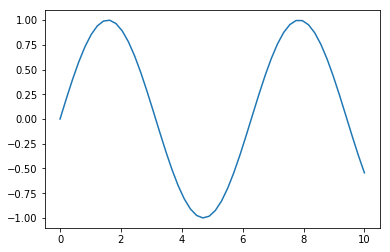

In [33]:
x = np.linspace(0,10,50)
a = np.sin(x)
plt.plot(x, a)
plt.show()

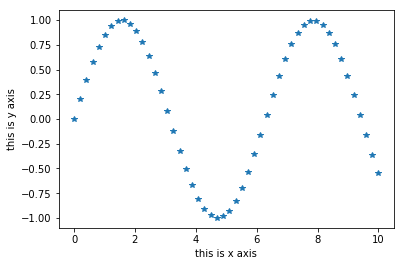

In [34]:
plt.plot(x,a, "*")
plt.xlabel('this is x axis')
plt.ylabel('this is y axis')
plt.show()

In [0]:
# Random forest
# load the library with the iris dataset
from sklearn.datasets import load_iris 
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier 
import pandas as pd # Load pandas
import numpy as np # Load numpy
np.random.seed(0) # Set random seed

In [36]:
# Create an object called iris with the iris data
iris = load_iris()
# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
print(iris.keys())
print(iris)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [

In [38]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target,iris.target_names)
# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
